<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from IPython.core.display import update_display
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-26 03:54:07--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-26 03:54:07--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-26 03:54:07--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [20]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df
  

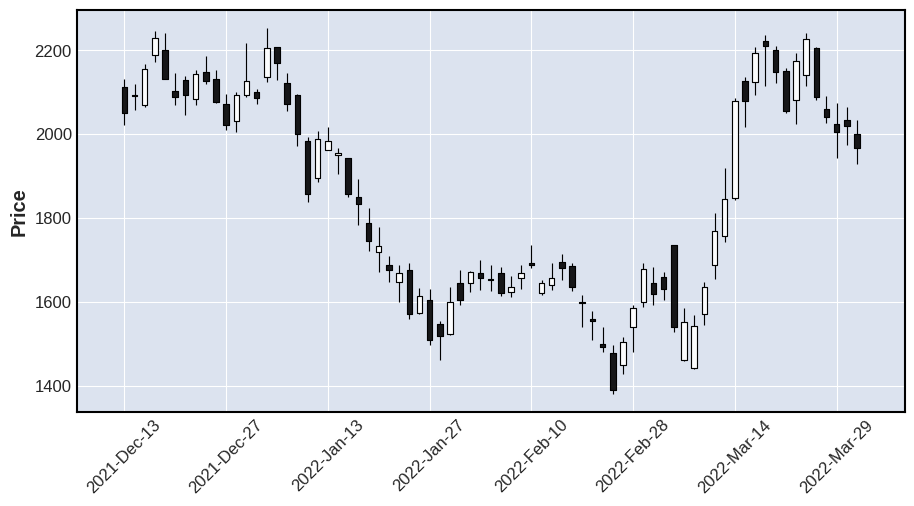

In [21]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(2929)   # ファーマフーズ
rdf = df[dt.datetime(2021, 12, 11):dt.datetime(2022, 3, 31)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

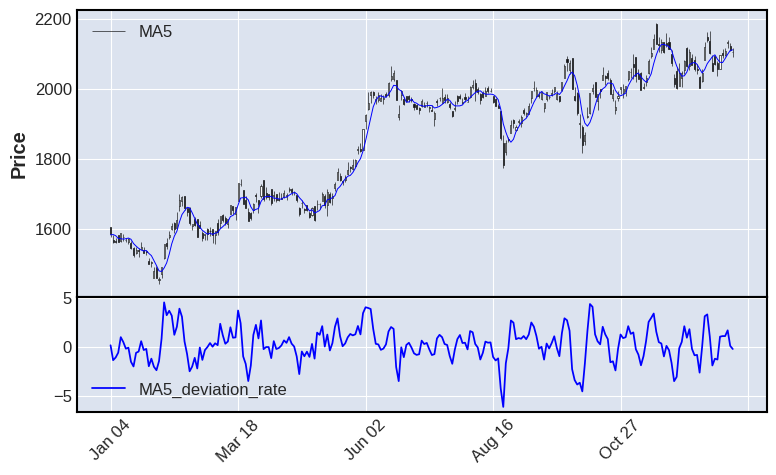

In [22]:
df = get_stock_data(7203)   # トヨタ自動車
close = df['Close']

# 5日移動平均
df['ma5'] = ta.SMA(close, timeperiod=5)

# 乖離率
df['ma5_deviation_rate'] = (close - df['ma5']) / df['ma5'] * 100

rdf = df[dt.datetime(2021, 1, 1):dt.datetime(2021, 12, 31)]

apd = [
    # 5日移動平均
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    #　乖離率
    mpf.make_addplot(rdf['ma5_deviation_rate'], color='blue', panel=1)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(5, 3), addplot=apd, returnfig=True)
axes[0].legend(['MA5'])
axes[2].legend(['MA5_deviation_rate'])
fig.show()

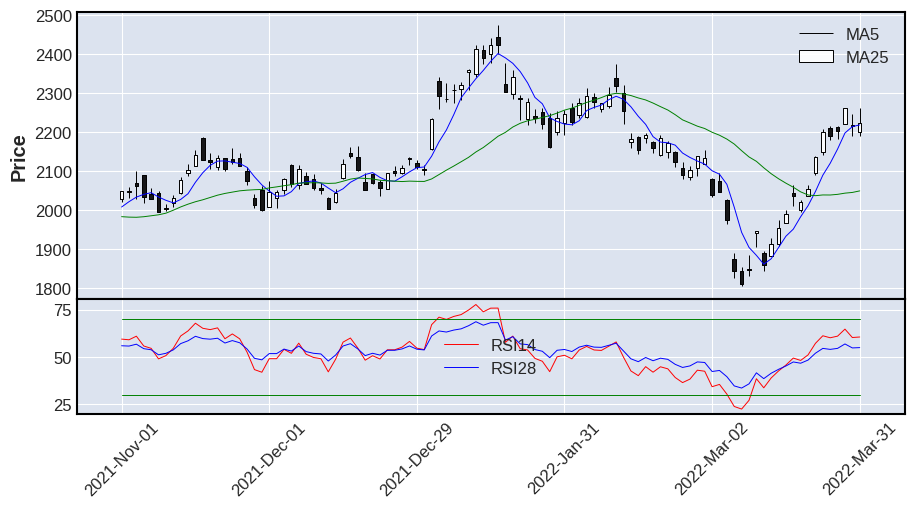

In [23]:
df = get_stock_data(7203)   # トヨタ自動車
close = df['Close']

# 移動平均
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)    # 短期14日
rsi28 = ta.RSI(close, timeperiod=28)    # 長期28日
df['rsi14'], df['rsi28'] = rsi14, rsi28

# 補助線
df['70'] = [70 for _ in close]  # 「買われすぎ」の目安
df['30'] = [30 for _ in close]  # 「売られすぎ」の目安

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=1, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=1, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['70'], color='green', panel=1, width=0.7),
    mpf.make_addplot(rdf['30'], color='green', panel=1, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['RSI14', 'RSI28'])
fig.show()

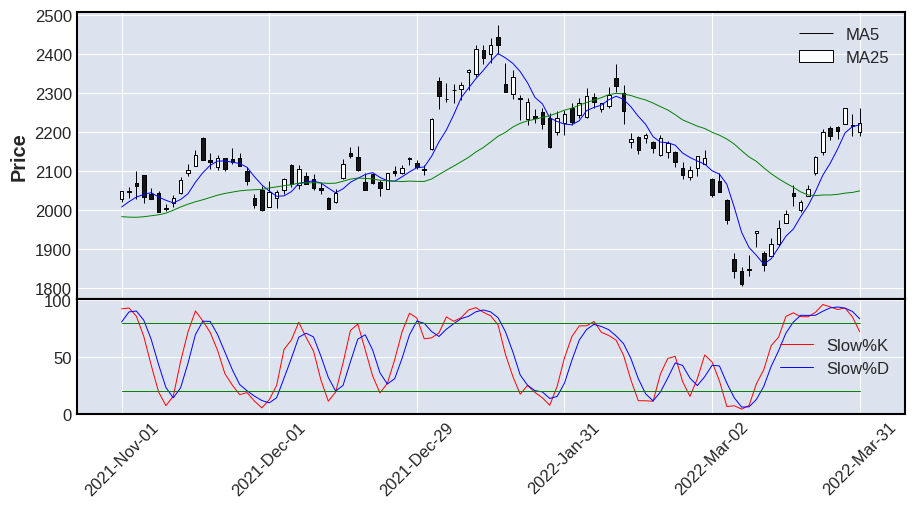

In [24]:
df = get_stock_data(7203)   # トヨタ自動車
close = df['Close']

# 移動平均
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], df['Close'],
                        fastk_period=5, slowk_period=3, slowk_matype=0,
                        slowd_period=3, slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

# 補助線
df['80'] = [80 for _ in close]  # [買われすぎ]の目安
df['20'] = [20 for _ in close]  # [売られすぎ]の目安

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # Slow%K
    mpf.make_addplot(rdf['slowK'], color='red', panel=1, width=0.7),
    # Slow%D
    mpf.make_addplot(rdf['slowD'], color='blue', panel=1, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['80'], color='green', panel=1, width=0.7),
    mpf.make_addplot(rdf['20'], color='green', panel=1, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['Slow%K', 'Slow%D'])
fig.show()

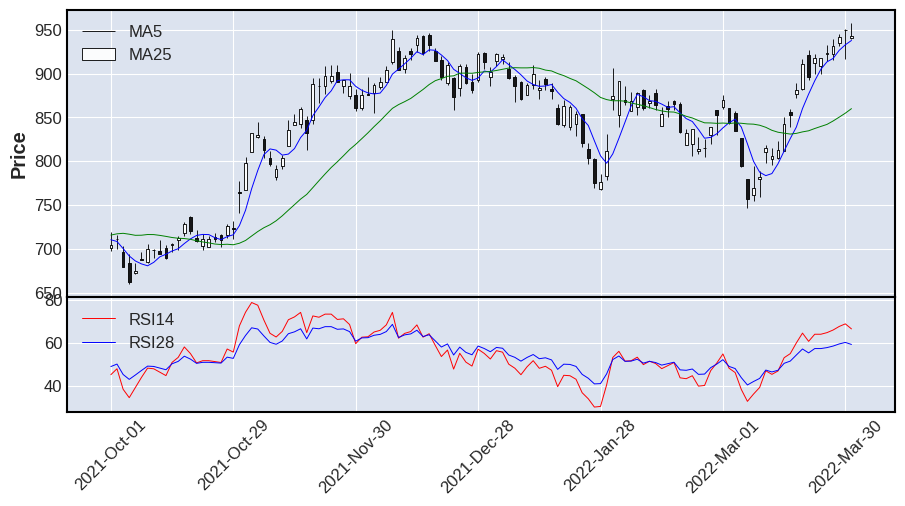

In [25]:
"""ダイバージェンスの例"""
df = get_stock_data(6727)   # ワコム
close = df['Close']

# 移動平均とRSI
df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)
df['rsi14'] = ta.RSI(close, 14)
df['rsi28'] = ta.RSI(close, 28)

rdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=1, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=1, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['RSI14', 'RSI28'])
fig.show()

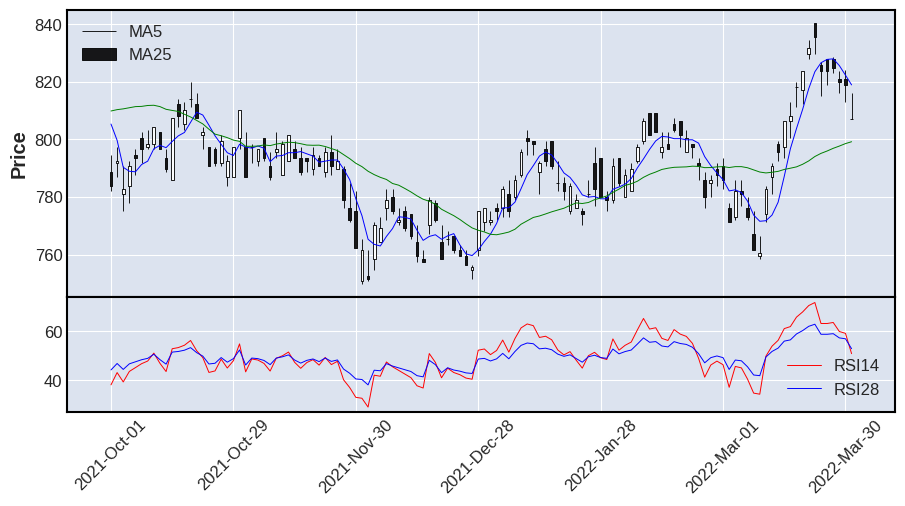

In [26]:
"""ダイバージェンスの例"""
df = get_stock_data(8628)   # 松井証券
close = df['Close']

# 移動平均とRSI
df['ma5'] = ta.SMA(close, timeperiod=5)
df['ma25'] = ta.SMA(close, timeperiod=25)
df['rsi14'] = ta.RSI(close, 14)
df['rsi28'] = ta.RSI(close, 28)

rdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=1, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=1, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['RSI14', 'RSI28'])
fig.show()

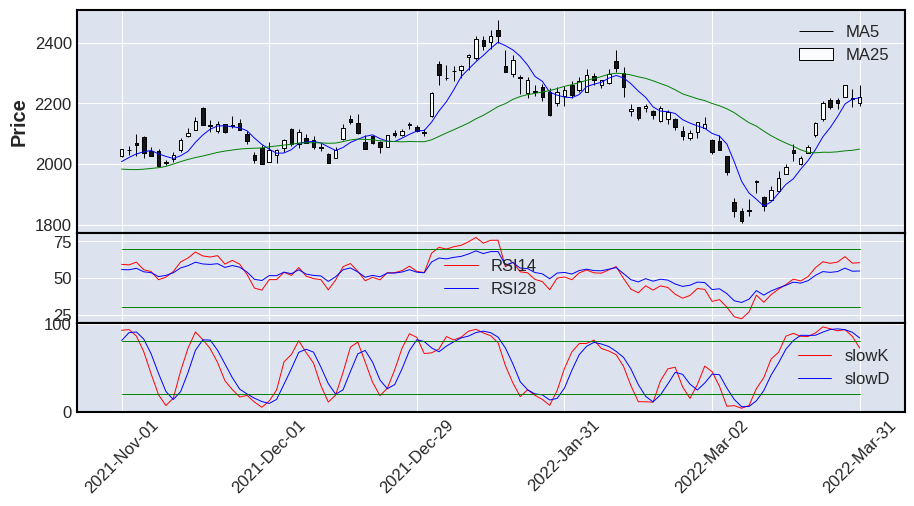

In [27]:
from mplfinance.plotting import make_addplot
df = get_stock_data(7203)   # トヨタ自動車
close = df['Close']

#　移動平均線
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], close,
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=1, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=1, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['70'], color='green', panel=1, width=0.7),
    mpf.make_addplot(rdf['30'], color='green', panel=1, width=0.7),
    # Slow%K
    mpf.make_addplot(rdf['slowK'], color='red', panel=2, width=0.7),
    # Slow%D
    mpf.make_addplot(rdf['slowD'], color='blue', panel=2, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['80'], color='green', panel=2, width=0.7),
    mpf.make_addplot(rdf['20'], color='green', panel=2, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['RSI14', 'RSI28'])
axes[4].legend(['slowK', 'slowD'])
fig.show()

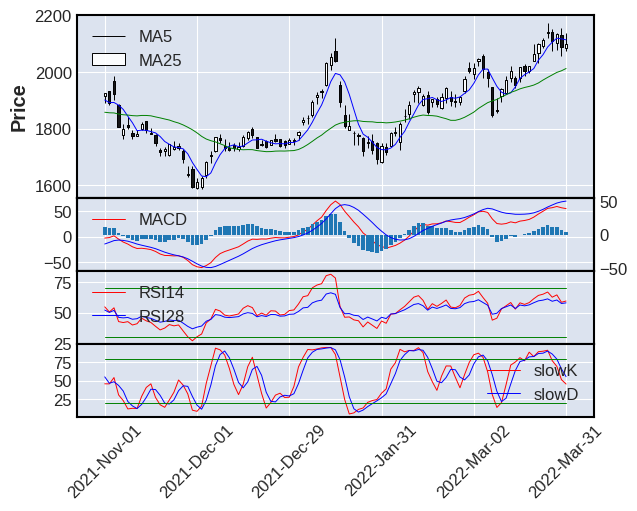

In [28]:
"""MACDを表示"""
df = get_stock_data(5401)   # 日本製鉄
close = df['Close']

#　移動平均線
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# MACD, シグナル, ヒストグラム
df['macd'], df['macd_signal'], df['hist'] = ta.MACD(close, fastperiod=12, slowperiod=26,
                                                   signalperiod=9)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], close,
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # MACD
    mpf.make_addplot(rdf['macd'], color='red', panel=1, width=0.7),
    # シグナル
    mpf.make_addplot(rdf['macd_signal'], color='blue', panel=1, width=0.7),
    # ヒストグラム
    mpf.make_addplot(rdf['hist'], panel=1, type='bar'),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=2, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=2, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['70'], color='green', panel=2, width=0.7),
    mpf.make_addplot(rdf['30'], color='green', panel=2, width=0.7),
    # Slow%K
    mpf.make_addplot(rdf['slowK'], color='red', panel=3, width=0.7),
    # Slow%D
    mpf.make_addplot(rdf['slowD'], color='blue', panel=3, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['80'], color='green', panel=3, width=0.7),
    mpf.make_addplot(rdf['20'], color='green', panel=3, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(5, 4), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['MACD', 'SIGNAL'])
axes[4].legend(['RSI14', 'RSI28'])
axes[6].legend(['slowK', 'slowD'])
fig.show()

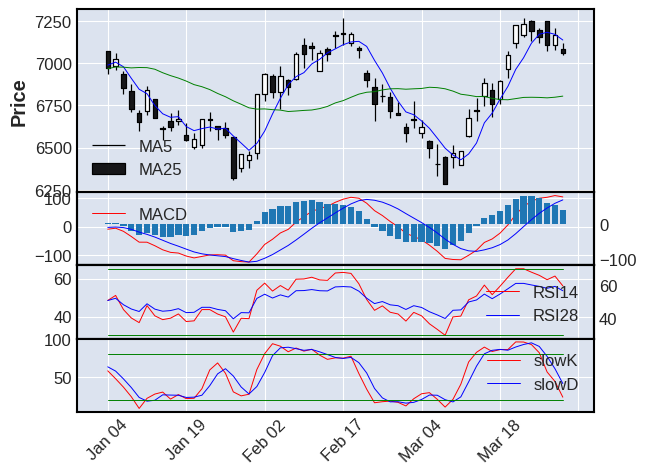

In [17]:
"""MACDを表示"""
df = get_stock_data(9020)   # 東日本旅客鉄道
close = df['Close']

#　移動平均線
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# MACD, シグナル, ヒストグラム
df['macd'], df['macd_signal'], df['hist'] = ta.MACD(close, fastperiod=12, slowperiod=26,
                                                   signalperiod=9)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], close,
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2022, 1, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # MACD
    mpf.make_addplot(rdf['macd'], color='red', panel=1, width=0.7),
    # シグナル
    mpf.make_addplot(rdf['macd_signal'], color='blue', panel=1, width=0.7),
    # ヒストグラム
    mpf.make_addplot(rdf['hist'], panel=1, type='bar'),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=2, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=2, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['70'], color='green', panel=2, width=0.7),
    mpf.make_addplot(rdf['30'], color='green', panel=2, width=0.7),
    # Slow%K
    mpf.make_addplot(rdf['slowK'], color='red', panel=3, width=0.7),
    # Slow%D
    mpf.make_addplot(rdf['slowD'], color='blue', panel=3, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['80'], color='green', panel=3, width=0.7),
    mpf.make_addplot(rdf['20'], color='green', panel=3, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(5, 4), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['MACD', 'SIGNAL'])
axes[4].legend(['RSI14', 'RSI28'])
axes[6].legend(['slowK', 'slowD'])
fig.show()

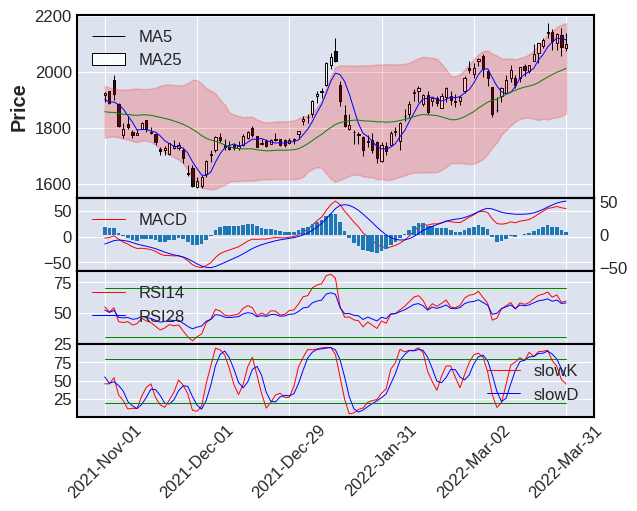

In [30]:
from matplotlib.pyplot import fill_between
"""MACD, RSI, ストキャスティクス, ボリンジャーバンドの±2σを同時に表示"""
df = get_stock_data(5401)   # 日本製鉄
close = df['Close']

#　移動平均線
df['ma5'], df['ma25'] = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25)

# ボリンジャーバンド±2σ
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25, nbdevup=2, 
                                          nbdevdn=2, matype=ta.MA_Type.SMA)

# MACD, シグナル, ヒストグラム
df['macd'], df['macd_signal'], df['hist'] = ta.MACD(close, fastperiod=12, slowperiod=26,
                                                   signalperiod=9)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df['High'], df['Low'], close,
                        fastk_period=5, slowk_period=3,
                        slowk_matype=0, slowd_period=3,
                        slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 3, 31)]

apd = [
    # 5日移動平均線
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    # 25日移動平均線
    mpf.make_addplot(rdf['ma25'], color='green', panel=0, width=0.7),
    # MACD
    mpf.make_addplot(rdf['macd'], color='red', panel=1, width=0.7),
    # シグナル
    mpf.make_addplot(rdf['macd_signal'], color='blue', panel=1, width=0.7),
    # ヒストグラム
    mpf.make_addplot(rdf['hist'], panel=1, type='bar'),
    # RSI 14
    mpf.make_addplot(rdf['rsi14'], color='red', panel=2, width=0.7),
    # RSI 28
    mpf.make_addplot(rdf['rsi28'], color='blue', panel=2, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['70'], color='green', panel=2, width=0.7),
    mpf.make_addplot(rdf['30'], color='green', panel=2, width=0.7),
    # Slow%K
    mpf.make_addplot(rdf['slowK'], color='red', panel=3, width=0.7),
    # Slow%D
    mpf.make_addplot(rdf['slowD'], color='blue', panel=3, width=0.7),
    # 補助線
    mpf.make_addplot(rdf['80'], color='green', panel=3, width=0.7),
    mpf.make_addplot(rdf['20'], color='green', panel=3, width=0.7)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(5, 4), addplot=apd, returnfig=True,
                     fill_between={'y1': rdf['lower2'].values, 'y2': rdf['upper2'].values,
                                   'color': 'red', 'alpha': 0.2})
axes[0].legend(['MA5', 'MA25'])
axes[2].legend(['MACD', 'SIGNAL'])
axes[4].legend(['RSI14', 'RSI28'])
axes[6].legend(['slowK', 'slowD'])
fig.show()